importing the dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)  # Accuracy changes will not be there just like random state in tts
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Dataset from keras.dataset

In [ ]:
# tf.keras.datasets.mnist.load_data(path='mnist.npz')
# Dataset is already preprocessed and train test splitted
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# X-train has 60000 images with 28 x 28 res
# y_train has 60000 labels
# X-test has 10000 images with 28 x 28 res
# y_test has 10000 labels

In [ ]:
# printing the 1 st image
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

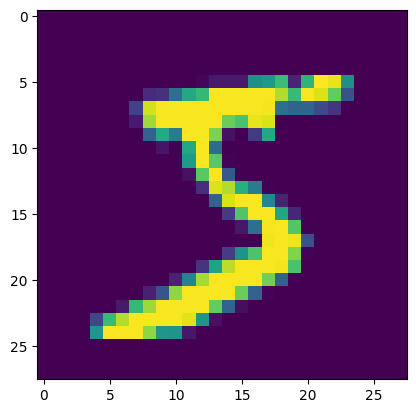

In [ ]:
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_train[0]

5

In [ ]:
cv2_imshow(X_train[0])

In [ ]:
# Unique Values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Given all images are 28 x 28 (similar dimension)

In [ ]:
# Normalizing the values (Scaling) 0-1 range

x_train_scaled = X_train/255
x_test_scaled = X_test/255

In [ ]:
x_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

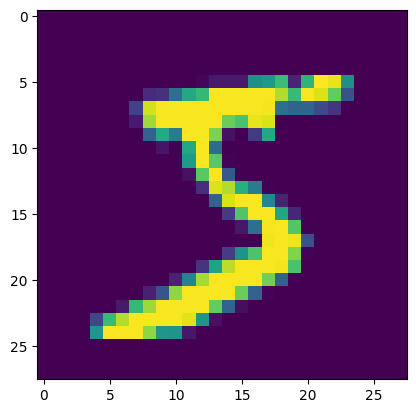

In [ ]:
plt.imshow(x_train_scaled[0])
plt.show()

Building the Neural Network
* CNN - Image Recog
* RNN - Audio / Text

In [ ]:
# setting up
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')  # labels = 10 category
])

In [ ]:
# compiling the neural networks
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 11ms/step - loss: 0.2459 - accuracy: 0.9280
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1060 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0741 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0309 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0220 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

Training Accuracy is 99.32

In [ ]:
loss, acc = model.evaluate(x_test_scaled, y_test)
print('Loss: ', loss)
print('Accuracy: ', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9756
Loss:  0.10299818217754364
Accuracy:  0.975600004196167


Test data Accuracy 97.64

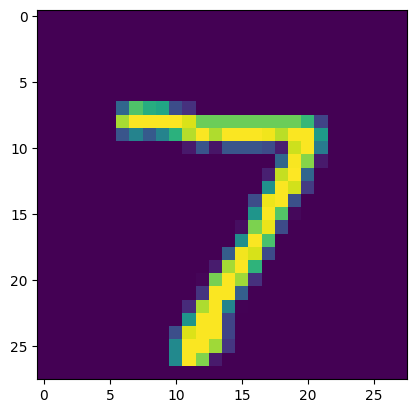

In [ ]:
plt.imshow(x_test_scaled[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test_scaled)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([1.0689749e-05, 2.6037162e-03, 7.8735519e-03, 9.6109521e-01,
       2.2543227e-06, 1.1926489e-04, 2.6750446e-09, 9.9999988e-01,
       3.3423924e-03, 8.1450358e-02], dtype=float32)

In [ ]:
label_for_the_first = np.argmax(y_pred[0])
print(label_for_the_first)

7


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

confusion matrix

In [ ]:
conf = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf)

tf.Tensor(
[[ 954    0    0    2    0   13    7    1    2    1]
 [   0 1125    2    0    0    2    2    1    3    0]
 [   1    0 1002    2    4    0    1   10   12    0]
 [   0    0    5  968    0   28    0    4    4    1]
 [   0    1    4    0  961    2    3    1    1    9]
 [   0    0    0    6    2  878    5    1    0    0]
 [   2    2    1    2    1    4  945    0    1    0]
 [   0    4    7    2    0    1    0 1008    2    4]
 [   2    0    3    4    6   13    1    3  939    3]
 [   0    3    0    4    4   11    2    4    6  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

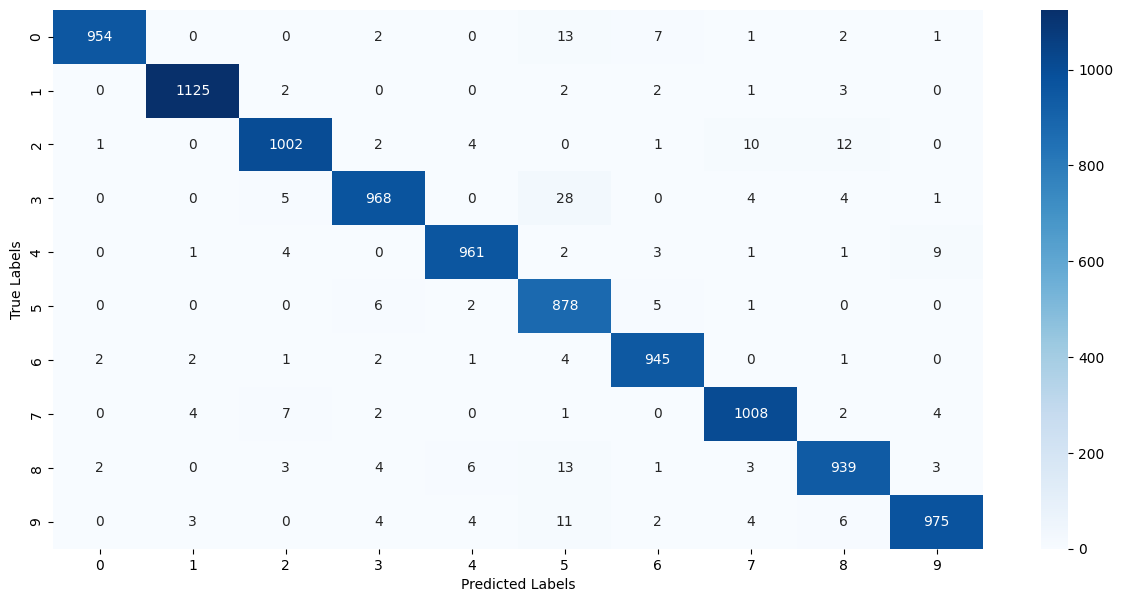

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building Predictive System

In [ ]:
input_image_path = '/content/input.jpeg'
img = cv2.imread(input_image_path)

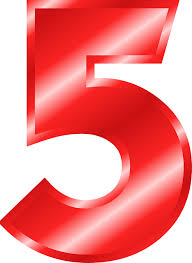

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(263, 192, 3)

The input is RGB and dim is 263 X 192 resolution

In [ ]:
gray_scaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

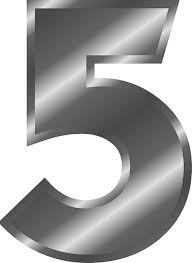

In [ ]:
cv2_imshow(gray_scaled)

In [ ]:
gray_scaled.shape

(263, 192)

In [ ]:
resized = cv2.resize(gray_scaled, (28,28))

In [ ]:
resized.shape

(28, 28)

In [ ]:
input_resized = resized/255

In [ ]:
final_input = np.reshape(input_resized, (1,28,28)) # 1 img with 28 x28

In [ ]:
pred = model.predict(final_input)

1/1 [==============================] - 0s 31ms/step


In [ ]:
pred

array([[1.5787957e-07, 4.1764416e-03, 9.9650460e-01, 1.2624093e-03,
        2.7757467e-30, 1.0000000e+00, 9.9524694e-12, 9.9994272e-01,
        1.6330446e-06, 5.3450265e-15]], dtype=float32)

In [ ]:
label_output = np.argmax(pred)

In [ ]:
label_output

5

In [ ]:
import pickle 

In [ ]:
file_name = 'mnistmodel.sav'
pickle.dump(model, open(file_name,'wb'))

Predictive System

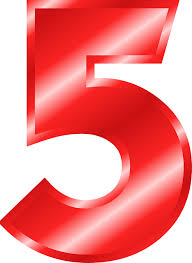

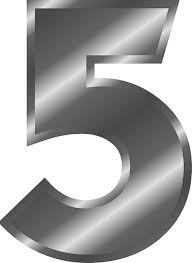

1/1 [==============================] - 0s 21ms/step
--------------------------
Prediction :  5


In [ ]:
# input_image_path = input('Enter the path of image : ')
input_image_path = '/content/input.jpeg'
img = cv2.imread(input_image_path)
cv2_imshow(img)
gray_scaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_scaled)
resized = cv2.resize(gray_scaled, (28,28))
input_resized = resized/255
final_input = np.reshape(input_resized, (1,28,28))
pred = model.predict(final_input)
label_output = np.argmax(pred)
print('--------------------------')
print('Prediction : ',label_output)